Written by [Gameli Ladzekpo](mailto:gameli.Ladzekpo@gmail.com) (Twitter/IG: @gamladz)

For [AI Core](theaicore.com)

In [98]:
import pandas as pd
import json
from ast import literal_eval
import numpy as np
import statsmodels.api as sm
import sklearn
from sklearn.linear_model import LinearRegression, Ridge
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import loguniform
from pandas import read_csv
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV



In [94]:
X_train = pd.read_csv('X_train.csv') 
y_train = pd.read_csv('y_train.csv')

                            OLS Regression Results                            
Dep. Variable:             prod_price   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     12.05
Date:                Thu, 25 Feb 2021   Prob (F-statistic):           5.08e-21
Time:                        17:07:18   Log-Likelihood:                -2388.3
No. Observations:                 425   AIC:                             4803.
Df Residuals:                     412   BIC:                             4855.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           12.3608      5.239      2.359   

<AxesSubplot:>

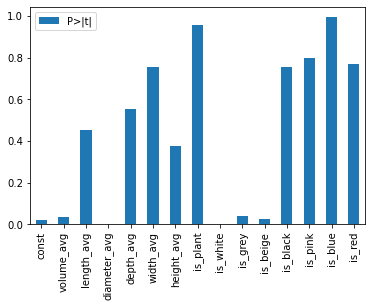

In [95]:
# - How important is each of your predictors
model = sm.OLS(y_train, X_train.astype(float)).fit()
predictions = model.predict(X_train) 

print_model = model.summary()
print(print_model)

"""
Recursive Feature elimination to make sure all P values are below 5% or 0.05. It indicates strong evidence against the null hypothesis, as there is less than a 5% probability the null is correct. Our null hypothesis is that non of these features have any bearing have on the outcome. In other words, Machine learning really starts with the assumption that we are wasting our time and the model has no predictive power and none of features are statistically signficant.
"""
results_as_html = model_summary.tables[1].as_html()
summary_df = pd.read_html(results_as_html, header=0, index_col=0)[0]
summary_df.plot(kind='bar',y='P>|t|')



In [ ]:
# Recursive Feature elimination to make sure all P values are below 5% or 0.05. It indicates strong evidence against the null hypothesis, as there is less than a 5% probability the null is correct. Our null hypothesis is that non of these features have any bearing have on the outcome. In other words, Machine learning really starts with the assumption that we are wasting our time and the model has no predictive power and none of features are statistically signficant.
results_as_html = model_summary.tables[1].as_html()
summary_df = pd.read_html(results_as_html, header=0, index_col=0)[0]
summary_df.plot(kind='bar',y='P>|t|')

In [96]:
# Recursive Feature Elimination
for col in drop_cols:
    drop_cols =['is_plant','is_pink','is_black','is_blue','width_avg','depth_avg', 'in_outdoor','is_red', 'height_avg', 'volume_avg']
    X_train = X_train.drop(col, axis=1)
    model = sm.OLS(y_train, X_train.astype(float)).fit()
    predictions = model.predict(X_train) 

model_summary = model.summary()
print(model_summary)


                            OLS Regression Results                            
Dep. Variable:             prod_price   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     35.84
Date:                Thu, 25 Feb 2021   Prob (F-statistic):           8.97e-26
Time:                        17:07:23   Log-Likelihood:                -2389.8
No. Observations:                 425   AIC:                             4790.
Df Residuals:                     420   BIC:                             4810.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           11.5689      4.090      2.828   

<AxesSubplot:>

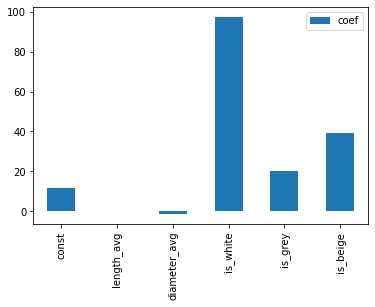

In [97]:
# - How does your prediction change when you increase/decrease each of your predictors (in their original units) by a certain amount?
results_as_html = model_summary.tables[1].as_html()
summary_df = pd.read_html(results_as_html, header=0, index_col=0)[0]
summary_df.plot(kind='bar',y='coef')

# If I increase y_hat by one unit, I increase the is_white variable the 'is_white' variable by 97.6%. But, is_white is a Boolean value whch means it can only be true or false. i.e. it can only be 0 or 1 . So the max it can be increased is from 0 - 1 and he max it can be decreased is from 1-0. That move will always result in a 97% incease or decrease

In [24]:

pca = PCA(n_components=6)
pca.fit(X_train)
X_train_pca = pca.fit_transform(X_train)

# print(score)

In [84]:

from scipy.stats import loguniform
from pandas import read_csv
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV

model = Ridge()

# define evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['lsqr']
space['alpha'] = loguniform(40, 70)
space['fit_intercept'] = [True, False]
space['normalize'] = [True]
# define search
search = RandomizedSearchCV(model, space, n_iter=300, scoring='r2', n_jobs=-1, cv=cv, random_state=1, return_train_score=True)

result = search.fit(X_train, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)




Best Score: 0.11801338988452151
Best Hyperparameters: {'alpha': 63.11903032841424, 'fit_intercept': False, 'normalize': True, 'solver': 'lsqr'}


In [91]:
space['solver'] = ['lsqr']
space['alpha'] = loguniform(63.11903032841424,63.11903032841425 )
space['fit_intercept'] = [False]
space['normalize'] = [True]
search = RandomizedSearchCV(model, space, n_iter=1, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv, random_state=1, return_train_score=True)
result = search.fit(X_train, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -31.66656545812538
Best Hyperparameters: {'alpha': 63.11903032841424, 'fit_intercept': False, 'normalize': True, 'solver': 'lsqr'}


In [32]:
lst = ['params','mean_test_score', 'mean_train_score']
pd.DataFrame(result.cv_results_).sort_values('mean_test_score', ascending = False)[lst]

,params,mean_test_score,mean_train_score
2,"{'alpha': 110.0010208931445, 'fit_intercept': ...",-0.065587,-0.002052
250,"{'alpha': 110.00358853143881, 'fit_intercept':...",-0.065588,-0.002054
98,"{'alpha': 110.02562800511467, 'fit_intercept':...",-0.065597,-0.002068
149,"{'alpha': 110.11222858694322, 'fit_intercept':...",-0.065633,-0.002123
196,"{'alpha': 110.12472218364528, 'fit_intercept':...",-0.065638,-0.002131
...,...,...,...
251,"{'alpha': 119.74136891497423, 'fit_intercept':...",-0.069732,-0.008016
298,"{'alpha': 119.80865455438348, 'fit_intercept':...",-0.069759,-0.008056
171,"{'alpha': 119.87314959632083, 'fit_intercept':...",-0.069785,-0.008093
40,"{'alpha': 119.87587551537655, 'fit_intercept':...",-0.069786,-0.008095


In [100]:


""""
Notes on Interpretation


# - How would you explain this to a non-technical person who needs to approve your project?

The definition of R-squared is the percentage of the response variable variation that is explained by a linear model.
In my case the best performance on the training set was 0.118013. Which means the model explains 10% of the variability of the response data from the mean. As our data is normalised we're' looking at the relative importance of each feature.

# - How good is your model?

R^2 is a normalised and doesn't't depend on the scale of the error. 
A low R^2 isn't bad.' It really depends on how well something can be predicted, or how certain we can be of something.  A law of physics should be easier to predict than laws of human behaviour. In our case as we are trying to predict something like price, we want to be reasonably precise. We can't' so our results aren't' great here. 
Best performance on the validation set

# - How frequent/how big will be the error?

Means squared error = -4988.727073875736
Mean absolute error = -31.66656545812538

On average,
 we expect to get the price £31.6 pounds off on each prediction. For objects like wardrobes thats not too bad since they are quite expensive anyway. For more expensive objects

# - What does this mean for the problem that you are trying to solve?

 For the problem it means it could be that white is more predictable because there are more white objects so you could have high predictabilty, but that doesnt account for the co-efficient. Considering other things such as the volume_avg, since the co-efficient is low and the P value is low, it means this feature is a good feature to predict on. A statistically signficant value, but it doesn't' increase or decrease the price. Could be acting as a flag a class of objects that are plant pots.

 So, for the problem I think I need more data. I can't' draw too many conclusions. But this method should help me learn the pricing strategies.

 """"
 

SyntaxError: EOL while scanning string literal (<ipython-input-100-b6ea6ae60182>, line 30)